# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Javier, Michael Adrian M.\
_Student No._: 2019-04177\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Michael Adrian M. Javier

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [61]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = "Arial"

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


Generate the data

In [62]:
# Generate points from 0 to 3
x_0, x_n, N = 0, 3, 100
xnum = np.linspace(x_0, x_n, N)

# Normal distribution
mu, sigma = 0, 0.1
eps_num = [np.random.normal(mu, sigma) for x in xnum]

# Sine function
def f(x):
    return x*np.sin(x)

# Needed function
def y(x):
    return f(x) + eps_num

Plot the data

Text(0.5, 1.0, 'Dataset')

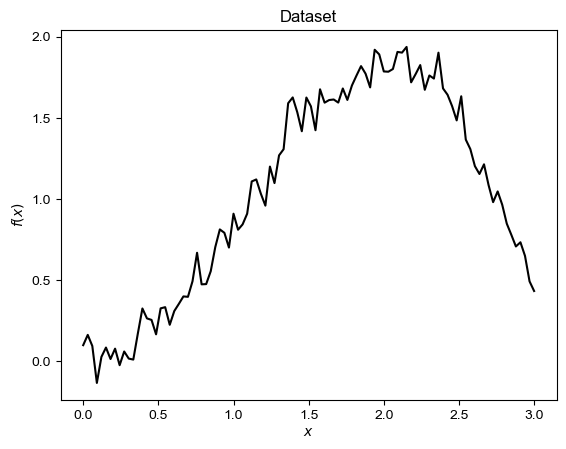

In [63]:
plt.plot(xnum, y(xnum), 'k')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Dataset')

We split the data into training, cross-validation, and test set using `sklearn.model_selection.train_test_split`. Since `sklearn` only splits the data into two and not three like we need, we can split the data into two first, and split it again. 

In [64]:
# Import splitter
from sklearn.model_selection import train_test_split

# Split the data 50-50
x_train, x_half, y_train, y_half = train_test_split(xnum, y(xnum), train_size=0.5, random_state=0) # train_size=0.5 kasi kalahati, random_state=0 yun yung seed sa splitting

# Split the data again to 25-25
x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) 

We then get the polynomial fits from $d=0$ to $d=14$. 

In [65]:
# Start and end of degree
d0, dn = 0, 14

# Fitting of polynomial
polyfits_train = [np.polyfit(x_train, y_train, i) for i in range(d0, dn+1)]

# Using the polynomial fits and plot
polys_train = [np.poly1d(polyfits_train[i])(x_train) for i in range(d0, dn+1)]

Text(0.5, 1.0, 'Polynomial fits of the dataset')

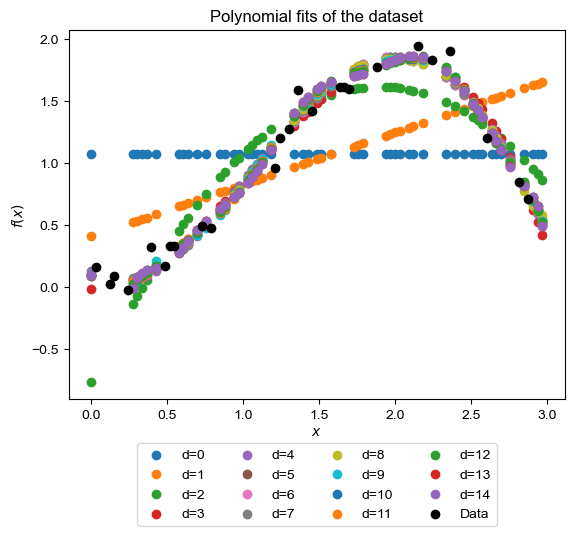

In [66]:
# Plotting the function
for i in range(d0, dn+1):
    plt.scatter(x_train, polys_train[i], label='d={degree}'.format(degree = i))
plt.scatter(x_cross, y_cross, color='k', label='Data')
plt.legend(loc='upper center', ncol=4, fancybox=True, bbox_to_anchor=(0.5,-0.1))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Polynomial fits of the dataset')

We can see that this is very ugly. Not just the colors, but you cannot you can't see the fits for each degree. Let's back up a bit by only plotting degrees $2,3,7,10,14$. Let's also choose nice colors this time.

Text(0.5, 1.0, 'Polynomial fits of the training dataset')

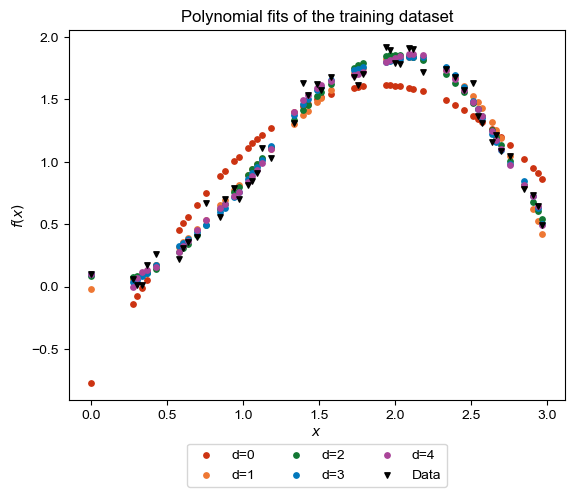

In [88]:
colors = ['#CC3311', '#EE7733', '#117733', '#0077BB', '#AA4499']
degs = [2,3,7,10,14]

for i in range(5):
    plt.scatter(x_train, polys_train[degs[i]], label='d={degree}'.format(degree = i), color='{Color}'.format(Color=colors[i]), s=15)
plt.scatter(x_train, y_train, color='k', label='Data', s=15, marker='v')
plt.legend(loc='upper center', ncol=3, fancybox=True, bbox_to_anchor=(0.5,-0.1))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Polynomial fits of the training dataset')

To get the rms error of the cross-validation `y_cross` and our obtained fits in `polys` for cross-validation, we need to use `sklearn.metrics.mean_squared_error`.

In [68]:
# Import from sklearn
from sklearn.metrics import mean_squared_error

# Fitting of polynomial
# polyfits_cross = [np.polyfit(x_cross, y_cross, i) for i in range(d0, dn+1)]

# Using the polynomial fits and plot
polys_cross = [np.poly1d(polyfits_train[i])(x_cross) for i in range(d0, dn+1)]

# Get the rms errors of cross-validation and their fits
rmses_cross = [mean_squared_error(y_cross, polys_cross[i]) for i in range(d0, dn+1)]

# Get the rms errors of training and their fits 
rmses_train = [mean_squared_error(y_train, polys_train[i]) for i in range(d0, dn+1)]

Text(0.5, 1.0, 'Polynomial fits of the cross-validation dataset')

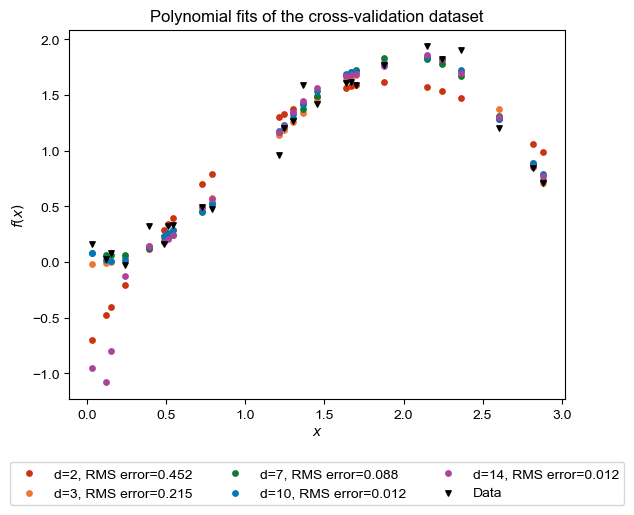

In [69]:
colors = ['#CC3311', '#EE7733', '#117733', '#0077BB', '#AA4499']
degs = [2,3,7,10,14]

for i in range(5):
    # plt.scatter(x_cross, polys_cross[i], label='d={degree}, RMS={rms}'.format(degree = i, rms=round(rmses_cross[i], 3)))
    plt.scatter(x_cross, polys_cross[degs[i]], label='d={degree}, RMS error={rms}'.format(degree = degs[i], rms=round(rmses_cross[i], 3)), \
                color='{Color}'.format(Color=colors[i]), s=15)
plt.scatter(x_cross, y_cross, color='k', label='Data', s=15, marker='v')
plt.legend(loc='upper center', ncol=3, fancybox=True, bbox_to_anchor=(0.5,-0.15))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Polynomial fits of the cross-validation dataset')

However, we won't see the general behavior of the RMS errors if we just look at them like this. Let's try to plot each RMS error per degree

Text(0.5, 1.0, 'RMS error between datasets')

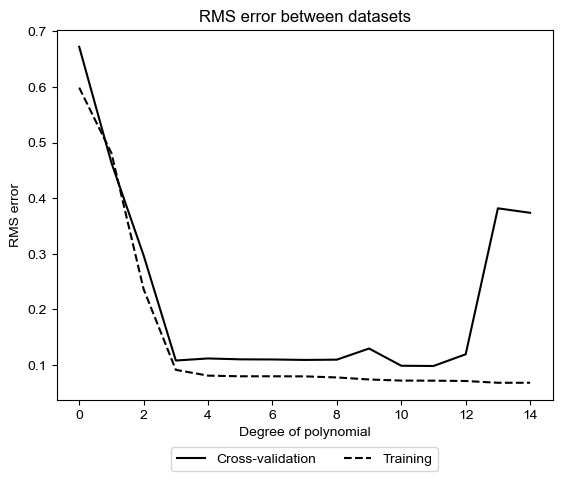

In [70]:
plt.plot(np.sqrt(rmses_cross), label='Cross-validation', color='k', linestyle='-')
plt.plot(np.sqrt(rmses_train), label='Training', color='k', linestyle='--')
plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.11))
plt.xlabel('Degree of polynomial')
plt.ylabel('RMS error')
plt.title('RMS error between datasets')

We can also get the rms errors for the test set. 

In [71]:
# Fitting of polynomial
#polyfits_test = [np.polyfit(x_test, y_test, i) for i in range(d0, dn+1)]

# Using the polynomial fits and plot
polys_test = [np.poly1d(polyfits_train[i])(x_test) for i in range(d0, dn+1)]

# Get the rms errors of cross-validation and their fits
rmses_test = [mean_squared_error(y_test, polys_test[i]) for i in range(d0, dn+1)]

Text(0.5, 1.0, 'RMS error between datasets')

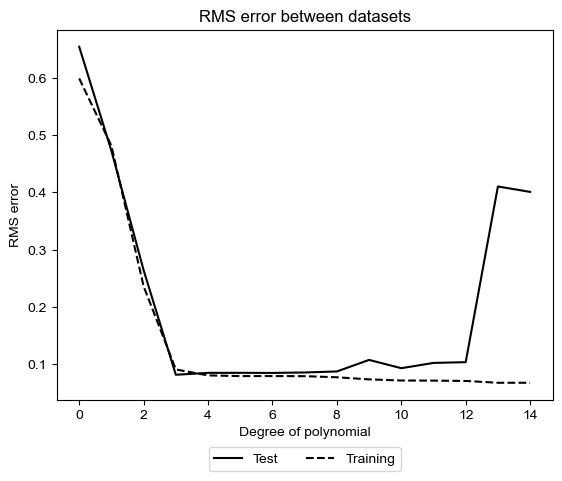

In [72]:
plt.plot(np.sqrt(rmses_test), label='Test', color='k', linestyle='-')
plt.plot(np.sqrt(rmses_train), label='Training', color='k', linestyle='--')
plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.11))
plt.xlabel('Degree of polynomial')
plt.ylabel('RMS error')
plt.title('RMS error between datasets')

Let's try making this into a neat function. However, we're only taking 

In [73]:
import pandas as pd 

def mean_error(func, x_list):
    # Normal distribution
    mu, sigma = 0, 0.1
    eps_num = [np.random.normal(mu, sigma) for x in x_list]

    def y(x_list):
        return func(x_list) + eps_num

    # Degree range 
    d0, dn = 0, 14

    # Split the data 50-50
    x_train, x_half, y_train, y_half = train_test_split(x_list, y(x_list), train_size=0.5, random_state=0) # training
    x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) # cross-validation and test

    # Fitting of polynomial train
    polyfits_train = [np.polyfit(x_train, y_train, i) for i in range(d0, dn+1)]
    polys_train = [np.poly1d(polyfits_train[i])(x_train) for i in range(d0, dn+1)]
    polys_cross = [np.poly1d(polyfits_train[i])(x_cross) for i in range(d0, dn+1)]
    polys_test = [np.poly1d(polyfits_train[i])(x_test) for i in range(d0, dn+1)]

    # Get the rms errors of cross-validation and their fits
    rmses_cross = [mean_squared_error(y_cross, polys_cross[i]) for i in range(d0, dn+1)]
    rmses_train = [mean_squared_error(y_train, polys_train[i]) for i in range(d0, dn+1)]
    rmses_test = [mean_squared_error(y_test, polys_test[i]) for i in range(d0, dn+1)]

    # Plots
    deglist = [2, 3, 7, 10, 14]
    plt.figure(figsize=[20, 5])
    ## Plot of the data with the fits
    plt.subplot(1, 3, 1)
    plt.title('Polynomial fits of the training data')
    plt.scatter(x_list, y(x_list), color='k', label='Data', s=10)
    for i in deglist:
        plt.scatter(x_train, polys_train[i], label='d={degree}'.format(degree = i), s=10)
    plt.legend(loc='upper center', ncol=3, fancybox=True, bbox_to_anchor=(0.5,-0.07))
    ## Plot of RMS between cross-validation and training 
    plt.subplot(1, 3, 2)
    plt.title('RMS error bet. cross-validation and training data')
    plt.plot(np.sqrt(rmses_train), label='Training', color='k', linestyle='solid')
    plt.plot(np.sqrt(rmses_cross), label='Cross-validation', color='k', linestyle='dashed')
    plt.plot(np.sqrt(rmses_test), label='Test', color='k', linestyle='dotted')
    plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))

    return None

### Example 1

Let's try testing this with 
$$ f(x) = x^2e^{-x} + e^{-10x^2} $$

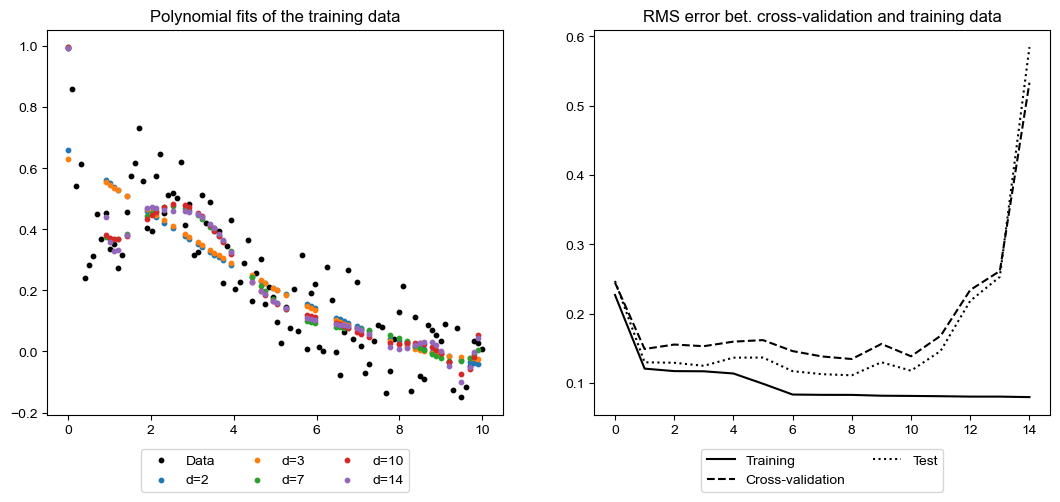

In [74]:
def func_new(x):
    return x**2*np.exp(-x) + np.exp(-10*x**2)

x_new = np.linspace(0,10,100)

mean_error(func_new, x_new)

This looks rotten. The trend of the fits can't be assessed easily. Although the data is available in points, the trend of the fits can't be seen properly. Furthermore, these are only fits, so we can use lines instead of points.

Let's unjumble the data. Part of the code used is taken from https://stackoverflow.com/questions/68766144/pandas-sort-column-but-keep-elements-of-the-same-category-together.

In [75]:
import pandas as pd 

def mean_error1(func, x_list, error):
    # Normal distribution
    mu, sigma = 0, error
    eps_num = [np.random.normal(mu, sigma) for x in x_list]

    def y(x_list):
        return func(x_list) + eps_num

    # Degree range 
    d0, dn = 0, 14

    # Split the data 50-50
    x_train, x_half, y_train, y_half = train_test_split(x_list, y(x_list), train_size=0.5, random_state=0) # training
    x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) # cross-validation and test

    # Unjumbling the data
    ## Making the data into a dataframe
    train_arr, cross_arr, test_arr = np.array([x_train, y_train]), np.array([x_cross, y_cross]), np.array([x_test, y_test])
    train_df, cross_df, test_df = pd.DataFrame(train_arr.T, columns=['x_data', 'y_data']), \
        pd.DataFrame(cross_arr.T, columns=['x_data', 'y_data']), pd.DataFrame(test_arr.T, columns=['x_data', 'y_data'])
    ## Sorting xdata with the ydata
    train_sort, cross_sort, test_sort = ( train_df.assign(key=train_df.groupby('y_data')['x_data'].transform('max'))
        .sort_values(['key', 'y_data', 'x_data'], ascending=True, ignore_index=True)
        .drop(columns=['key'])), \
        ( cross_df.assign(key=cross_df.groupby('y_data')['x_data'].transform('max'))
        .sort_values(['key', 'y_data', 'x_data'], ascending=True, ignore_index=True)
        .drop(columns=['key'])), \
        ( test_df.assign(key=test_df.groupby('y_data')['x_data'].transform('max'))
        .sort_values(['key', 'y_data', 'x_data'], ascending=True, ignore_index=True)
        .drop(columns=['key']))
    ## Separating them into numpy arrays
    xtrain_sort, ytrain_sort = train_sort.iloc[:,0].to_numpy(), train_sort.iloc[:,1].to_numpy()
    xcross_sort, ycross_sort = cross_sort.iloc[:,0].to_numpy(), cross_sort.iloc[:,1].to_numpy()
    xtest_sort, ytest_sort = test_sort.iloc[:,0].to_numpy(), test_sort.iloc[:,1].to_numpy()

    # Fitting of polynomial train
    polyfits_train = [np.polyfit(xtrain_sort, ytrain_sort, i) for i in range(d0, dn+1)]
    polys_train = [np.poly1d(polyfits_train[i])(xtrain_sort) for i in range(d0, dn+1)]
    polys_cross = [np.poly1d(polyfits_train[i])(xcross_sort) for i in range(d0, dn+1)]
    polys_test = [np.poly1d(polyfits_train[i])(xtest_sort) for i in range(d0, dn+1)]

    # Get the rms errors of cross-validation and their fits
    rmses_cross = [mean_squared_error(ycross_sort, polys_cross[i]) for i in range(d0, dn+1)]
    rmses_train = [mean_squared_error(ytrain_sort, polys_train[i]) for i in range(d0, dn+1)]
    rmses_test = [mean_squared_error(ytest_sort, polys_test[i]) for i in range(d0, dn+1)]

    # Plots
    deglist = [2, 3, 7, 10, 14]
    plt.figure(figsize=[20, 5])
    ## Plot of the data with the fits
    plt.subplot(1, 3, 1)
    plt.title('Polynomial fits of the training data')
    plt.scatter(x_list, y(x_list), color='k', label='Data', s=10)
    colors = ['#CC3311', '#EE7733', '#117733', '#0077BB', '#AA4499'] # colors obtained from https://personal.sron.nl/~pault/
    t = -1 # counter for colors
    for i in deglist:
        t += 1 # counter for colors
        plt.plot(xtrain_sort, polys_train[i], label='d={degree}'.format(degree = i), color=colors[t])
    plt.legend(loc='upper center', ncol=3, fancybox=True, bbox_to_anchor=(0.5,-0.07))
    ## Plot of RMS between cross-validation and training 
    plt.subplot(1, 3, 2)
    plt.title('RMS error bet. cross-validation and training data')
    plt.plot(np.sqrt(rmses_train), label='Training', color='k', linestyle='solid')
    plt.plot(np.sqrt(rmses_cross), label='Cross-validation', color='k', linestyle='dashed')
    plt.plot(np.sqrt(rmses_test), label='Test', color='k', linestyle='dotted')
    plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))

    # Check what degree produces the least RMS
    x_min, y_min = np.argmin(np.sqrt(rmses_test)), (np.max(np.sqrt(rmses_test)) - np.min(np.sqrt(rmses_test)))*0.8
    plt.axvline(x_min, color='red', alpha=0.5)
    plt.text(x_min, y_min, 'Best fit \n d={degree}'.format(degree = x_min), bbox=dict(facecolor = 'white', alpha = 0.8))

    return None

Let's try using it and see if the fits can be seen better. 

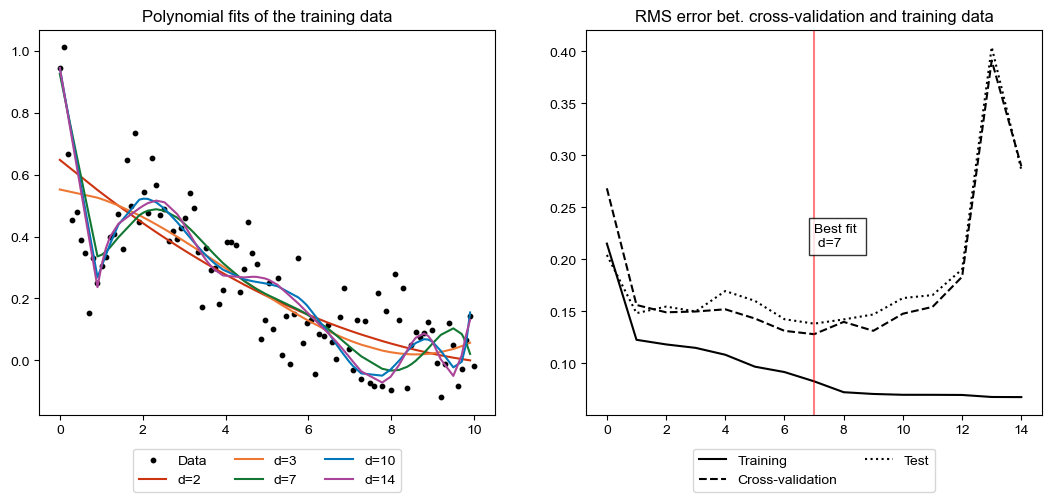

In [76]:
mean_error1(func_new, x_new, 0.1)

We even added which polynomial fit is the best to use for this data!

Let's try using this again for our previous example. 

## Example 1.5

$$ f(x) = x\sin(x) $$

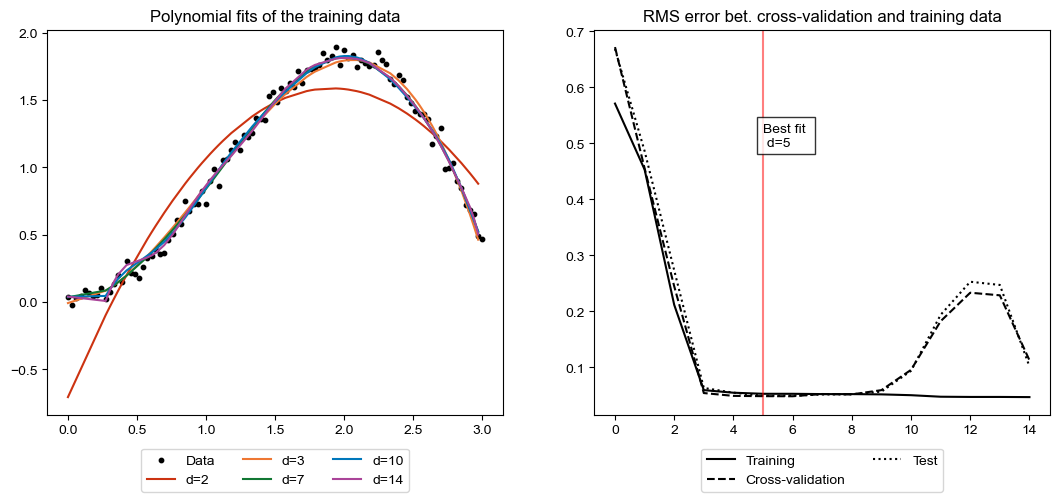

In [93]:
def f(x):
    return x*np.sin(x)

mean_error1(f, xnum, 0.05)

### Example 2

$$ f(x) = e^{-x}\sin(10x) $$

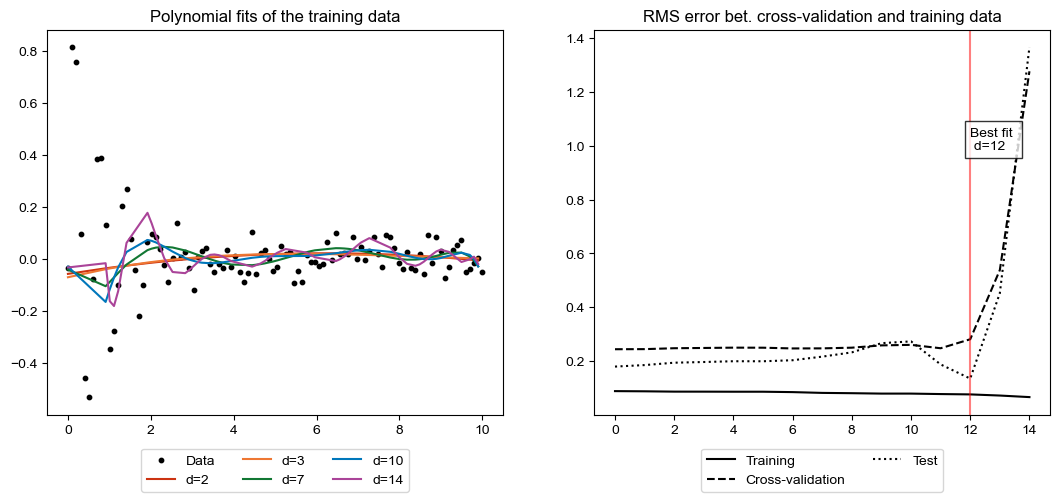

In [77]:
def f1(x):
    return np.exp(-x)*np.sin(10*x)

mean_error1(f1, x_new, 0.05)

We see that all of these look rough. The RMS error graph looks very flat too. This is because this sine wave is very oscillatory. Let's try to keep it down to $\sin(2x)$.

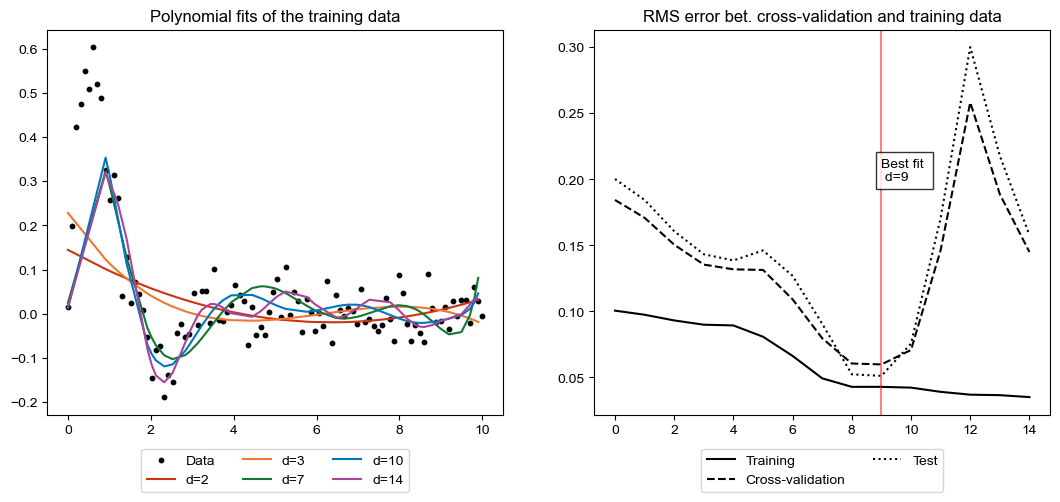

In [78]:
def f2(x):
    return np.exp(-x)*np.sin(2*x)

mean_error1(f2, x_new, 0.05)

We see that the fits look much better and the RMS error graphs look right. 

### Example 3

The reasons why the sky is red instead of blue during sunsets is that the rays have to travel more distance, making the blue wavelengths scatter above the troposphere and the red wavelengths scatter in the troposphere. The angle of the sun measured from the normal and the equivalent number of "atmospheres" that light has to pass through is given by:

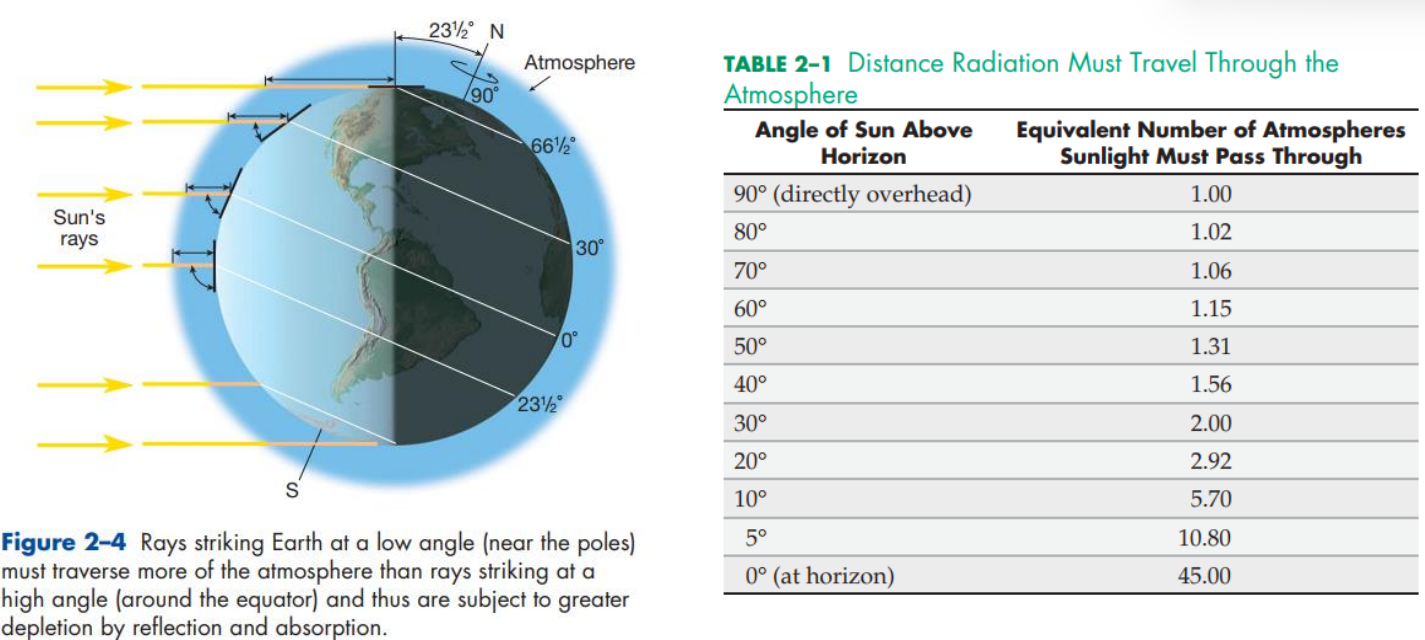

Theoretically, it is given by

$$ n_\text{atm} = \frac{2 r_E + h_\text{atm}}{\sqrt{r_E^2\cos^2\alpha + 2r_Eh_\text{atm} + h_\text{atm}^2} + r_E\cos\alpha}, \alpha = 90-\theta $$

If $r_E \gg h_\text{atm}$, 

$$ n \approx \frac{1}{\cos\theta} $$

Let's try introducing error to the data and test its mean error.

In [79]:
def natm(theta):
    alpha = 90*np.ones(len(theta)) - theta
    rE = 6371 # radius of earth in kilometers
    hatm = 600 # height of the thermopause
    return (2*rE + hatm)/(np.sqrt(rE**2*np.cos(alpha)**2 + 2*rE*hatm + hatm**2) + rE*np.cos(alpha))

Text(0, 0.5, 'Equivalent number of atmospheres')

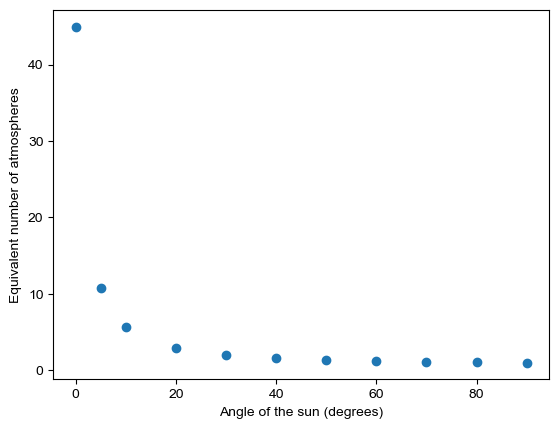

In [80]:
sun_angle_data = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]
atmos_data = [45.00, 10.80, 5.70, 2.92, 2.00, 1.56, 1.31, 1.15, 1.06, 1.02, 1.00]

plt.scatter(sun_angle_data, atmos_data)
plt.xlabel('Angle of the sun (degrees)')
plt.ylabel('Equivalent number of atmospheres')

Since we don't have a lot of data for data splitting, let's try to use cubic interpolation from `SciPy`. 

In [81]:
from scipy.interpolate import interp1d

inter_atmos = interp1d(sun_angle_data, atmos_data, 'cubic') # this produces a function in which you input sun angle data and outputs the inter
# polated equivalent number of atmospheres

Let's try inputting an array of sun angles with more datapoints.

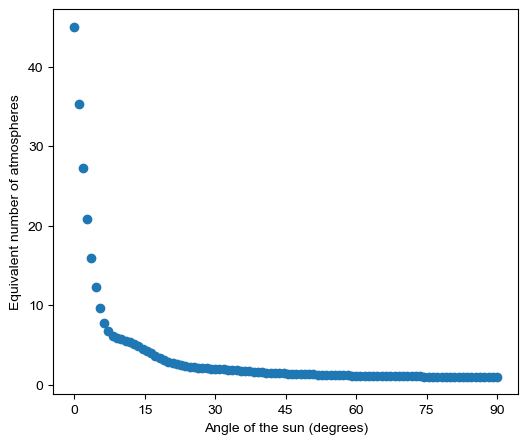

In [82]:
sun_angle = np.linspace(0, 90, 100)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
plt.scatter(sun_angle, inter_atmos(sun_angle))
plt.xlabel('Angle of the sun (degrees)')
plt.ylabel('Equivalent number of atmospheres')
ax.set_xticks([0, 15, 30, 45, 60, 75, 90])

Let's also introduce errors within the data. 

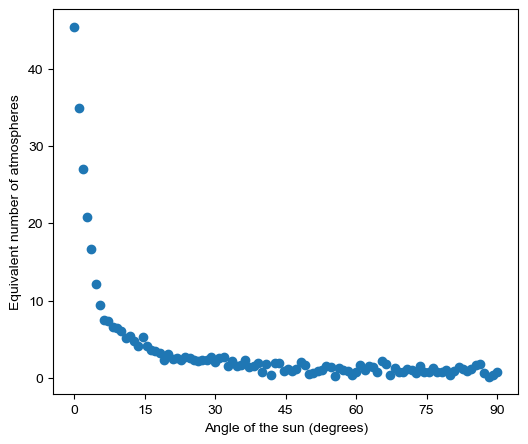

In [83]:
mu, sigma, k = 0, 0.1, 5
eps_num1 = k*np.array([np.random.normal(mu, sigma) for x in sun_angle])
atmos_error = inter_atmos(sun_angle) + eps_num1

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
plt.scatter(sun_angle, atmos_error)
plt.xlabel('Angle of the sun (degrees)')
plt.ylabel('Equivalent number of atmospheres')
ax.set_xticks([0, 15, 30, 45, 60, 75, 90])
plt.title('')

Now let's try to analyze its mean error. We just need to edit the function a bit to accomodate data arrays and not functions. Feel free to expand the block to see the code.

In [84]:
import pandas as pd 

def mean_error2(y_list, x_list, error):
    # Normal distribution
    mu, sigma = 0, error
    eps_num = [np.random.normal(mu, sigma) for x in x_list]

    f_list = y_list + eps_num

    # Degree range 
    d0, dn = 0, 14

    # Split the data 50-50
    x_train, x_half, y_train, y_half = train_test_split(x_list, f_list, train_size=0.5, random_state=0) # training
    x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) # cross-validation and test

    # Unjumbling the data
    ## Making the data into a dataframe
    train_arr, cross_arr, test_arr = np.array([x_train, y_train]), np.array([x_cross, y_cross]), np.array([x_test, y_test])
    train_df, cross_df, test_df = pd.DataFrame(train_arr.T, columns=['x_data', 'y_data']), \
        pd.DataFrame(cross_arr.T, columns=['x_data', 'y_data']), pd.DataFrame(test_arr.T, columns=['x_data', 'y_data'])
    ## Sorting xdata with the ydata
    train_sort, cross_sort, test_sort = ( train_df.assign(key=train_df.groupby('y_data')['x_data'].transform('max'))
        .sort_values(['key', 'y_data', 'x_data'], ascending=True, ignore_index=True)
        .drop(columns=['key'])), \
        ( cross_df.assign(key=cross_df.groupby('y_data')['x_data'].transform('max'))
        .sort_values(['key', 'y_data', 'x_data'], ascending=True, ignore_index=True)
        .drop(columns=['key'])), \
        ( test_df.assign(key=test_df.groupby('y_data')['x_data'].transform('max'))
        .sort_values(['key', 'y_data', 'x_data'], ascending=True, ignore_index=True)
        .drop(columns=['key']))
    ## Separating them into numpy arrays
    xtrain_sort, ytrain_sort = train_sort.iloc[:,0].to_numpy(), train_sort.iloc[:,1].to_numpy()
    xcross_sort, ycross_sort = cross_sort.iloc[:,0].to_numpy(), cross_sort.iloc[:,1].to_numpy()
    xtest_sort, ytest_sort = test_sort.iloc[:,0].to_numpy(), test_sort.iloc[:,1].to_numpy()

    # Fitting of polynomial train
    polyfits_train = [np.polyfit(xtrain_sort, ytrain_sort, i) for i in range(d0, dn+1)]
    polys_train = [np.poly1d(polyfits_train[i])(xtrain_sort) for i in range(d0, dn+1)]
    polys_cross = [np.poly1d(polyfits_train[i])(xcross_sort) for i in range(d0, dn+1)]
    polys_test = [np.poly1d(polyfits_train[i])(xtest_sort) for i in range(d0, dn+1)]

    # Get the rms errors of cross-validation and their fits
    rmses_cross = [mean_squared_error(ycross_sort, polys_cross[i]) for i in range(d0, dn+1)]
    rmses_train = [mean_squared_error(ytrain_sort, polys_train[i]) for i in range(d0, dn+1)]
    rmses_test = [mean_squared_error(ytest_sort, polys_test[i]) for i in range(d0, dn+1)]

    # Plots
    deglist = [2, 3, 7, 10, 14]
    plt.figure(figsize=[20, 5])
    ## Plot of the data with the fits
    plt.subplot(1, 3, 1)
    plt.title('Polynomial fits of the training data')
    plt.scatter(x_list, y(x_list), color='k', label='Data', s=10)
    colors = ['#CC3311', '#EE7733', '#117733', '#0077BB', '#AA4499'] # colors obtained from https://personal.sron.nl/~pault/
    t = -1 # counter for colors
    for i in deglist:
        t += 1 # counter for colors
        plt.plot(xtrain_sort, polys_train[i], label='d={degree}'.format(degree = i), color=colors[t])
    plt.legend(loc='upper center', ncol=3, fancybox=True, bbox_to_anchor=(0.5,-0.07))
    ## Plot of RMS between cross-validation and training 
    plt.subplot(1, 3, 2)
    plt.title('RMS error bet. cross-validation and training data')
    plt.plot(np.sqrt(rmses_train), label='Training', color='k', linestyle='solid')
    plt.plot(np.sqrt(rmses_cross), label='Cross-validation', color='k', linestyle='dashed')
    plt.plot(np.sqrt(rmses_test), label='Test', color='k', linestyle='dotted')
    plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))

    return None

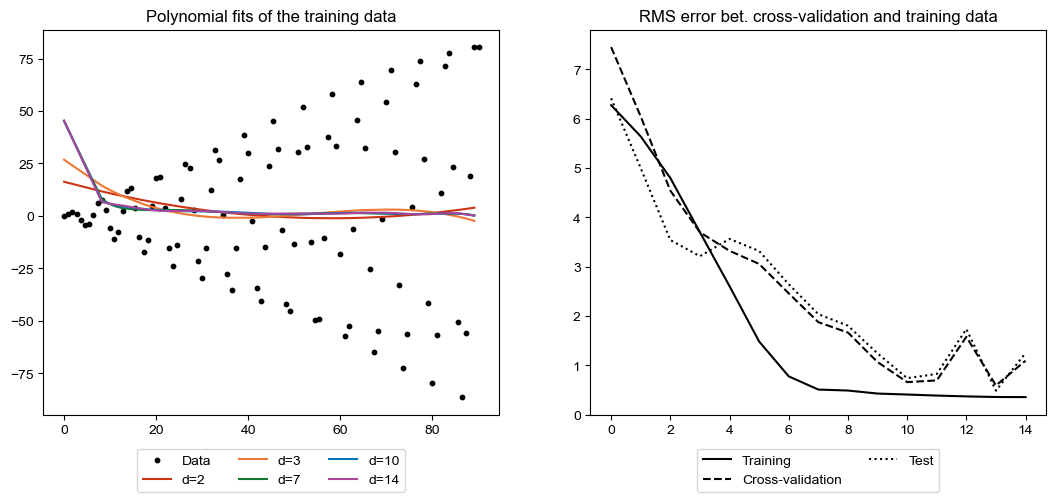

In [85]:
mean_error2(atmos_error, sun_angle, 0)